In [33]:
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os




In [3]:
imagePath = 'C:/Users/müge/Desktop/Datasets_Fellowship/Sentinel_Footprints/S2A_MSIL2A_20210910T120321_N0301_R023_T28RBS_20210910T144004.SAFE/GRANULE/L2A_T28RBS_A032481_20210910T120324/IMG_DATA/R10m/'
band2 = rasterio.open(imagePath+'T28RBS_20210910T120321_B02_10m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'T28RBS_20210910T120321_B03_10m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'T28RBS_20210910T120321_B04_10m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath+'T28RBS_20210910T120321_B08_10m.jp2', driver='JP2OpenJPEG') #nir

In [4]:
band4.count


1

In [5]:
band4.width

10980

In [6]:
band4.height

10980

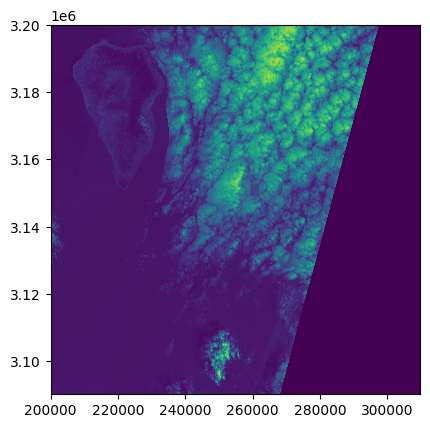

<AxesSubplot: >

In [7]:
plot.show(band4)

In [8]:
band4.dtypes[0]

'uint16'

In [9]:
band4.crs

In [10]:
band4.transform


Affine(10.0, 0.0, 199980.0,
       0.0, -10.0, 3200040.0)

In [11]:
band4.read(1)


array([[472, 496, 501, ...,   0,   0,   0],
       [468, 480, 517, ...,   0,   0,   0],
       [475, 430, 484, ...,   0,   0,   0],
       ...,
       [700, 630, 567, ...,   0,   0,   0],
       [741, 637, 603, ...,   0,   0,   0],
       [567, 608, 622, ...,   0,   0,   0]], dtype=uint16)

Text(0.5, 1.0, 'Red')

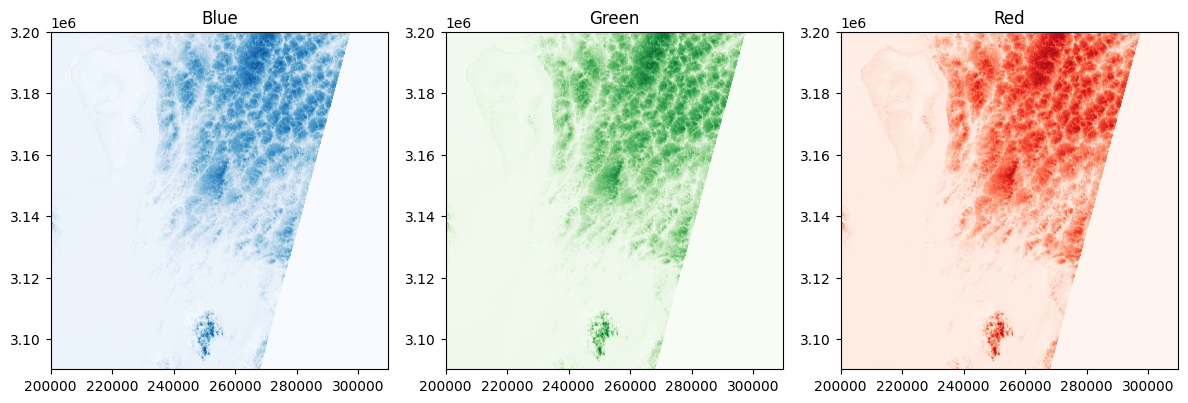

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')

fig.tight_layout()

ax1.set_title("Blue")
ax2.set_title("Green")
ax3.set_title("Red")


In [13]:
band4.crs

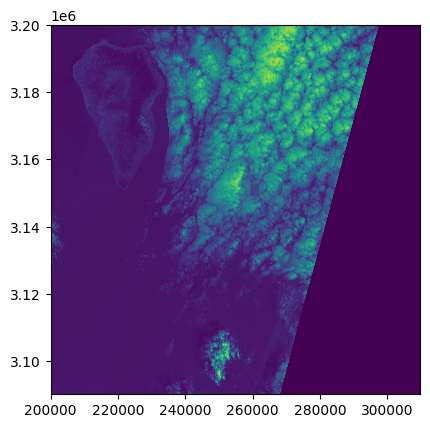

<AxesSubplot: >

In [31]:
trueColor = rasterio.open('C:/Users/müge/Desktop/Datasets_Fellowship/Sentinel_Footprints/T28RBS_20210910T120321_TCI_10m.jp2','w', driver='JP2OpenJPEG',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()
src = rasterio.open(r"C:/Users/müge/Desktop/Datasets_Fellowship/La_palma_bounds.tif", count=3)
plot.show(src)
